# Music Genre Recognition:

In [1]:
import numpy as np
import pandas as pd
import scipy
import tarfile
import os
from pathlib import Path
import scipy.io.wavfile
import scipy.fft
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import subprocess
import librosa
import seaborn
import math
import pickle
!pip install python_speech_features
from python_speech_features import mfcc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Bidirectional, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=c353053921d7f4073f4d729903e5b8585796d85b04a0caa49a29c7d425785d3c
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
main_folder = '/content/drive/MyDrive/DL/'

In [4]:
data_dir = main_folder + "genres/"

## Data Visualization:

In [ ]:
# Counting number of files per genre.
# for each folder

for folder in os.listdir(data_dir):
    if os.path.isfile(data_dir + folder):
        continue
    cnt = 0
    #For each file
    for filename in os.listdir(data_dir+"/"+folder+"/"):
        # count files
        cnt += 1
        
    print("Genre ", folder, " Contains :", cnt, " Music Files")

Genre  rock  Contains : 100  Music Files
Genre  reggae  Contains : 100  Music Files
Genre  blues  Contains : 100  Music Files
Genre  country  Contains : 100  Music Files
Genre  metal  Contains : 100  Music Files
Genre  classical  Contains : 100  Music Files
Genre  disco  Contains : 100  Music Files
Genre  pop  Contains : 100  Music Files
Genre  hiphop  Contains : 100  Music Files
Genre  jazz  Contains : 100  Music Files


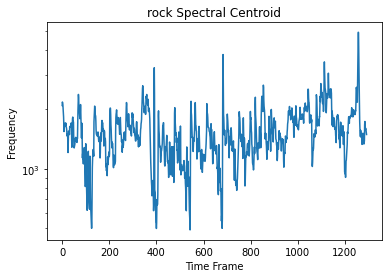

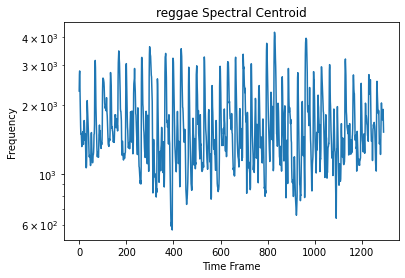

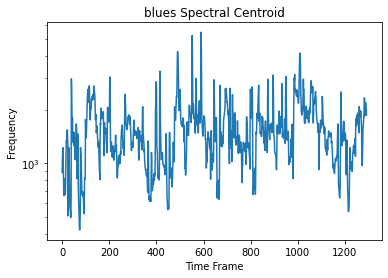

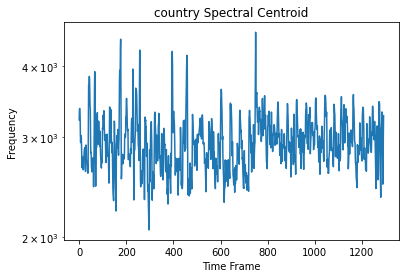

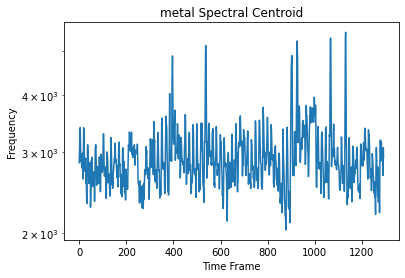

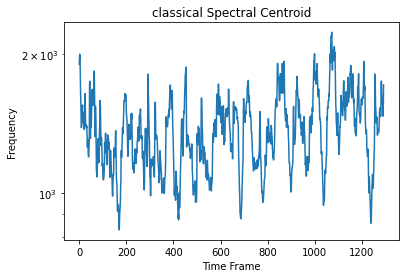

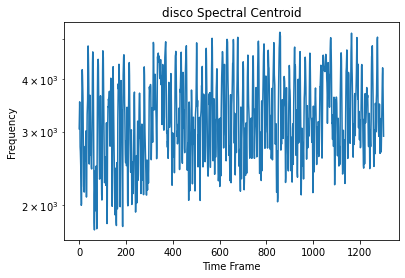

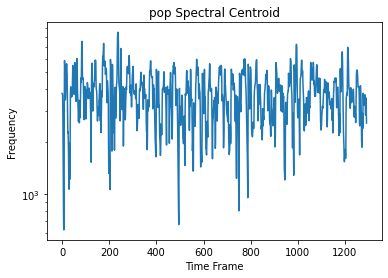

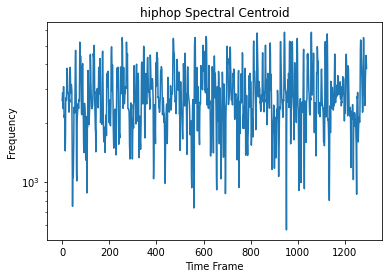

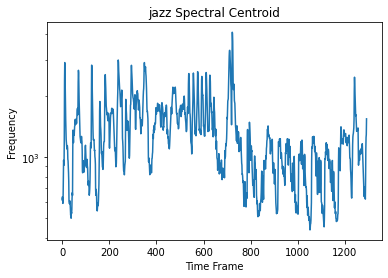

In [ ]:
# Computing spectral centroid.
# for each folder

for folder in os.listdir(data_dir):
    if os.path.isfile(data_dir + folder):
        continue
    try:
        # read one audio file
        audio_file = data_dir + folder + '/' + folder + '.00001.wav'
        rate, audio = librosa.load(audio_file)
        # https://librosa.github.io/librosa/generated/librosa.feature.spectral_centroid.html
        cent = librosa.feature.spectral_centroid(y=rate, sr=audio)
    
        fig = plt.figure()
        plt.semilogy(cent.T, label="spectral centroid")
        plt.ylabel("Frequency")
        plt.xlabel("Time Frame")
        plt.title(folder+" Spectral Centroid")
        plt.show()
    except:
        pass

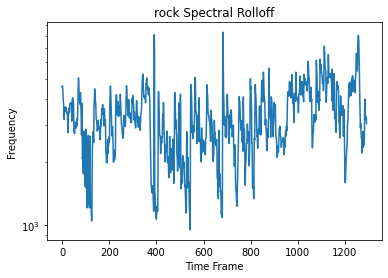

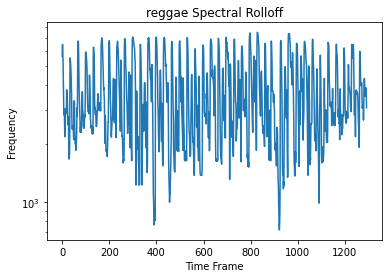

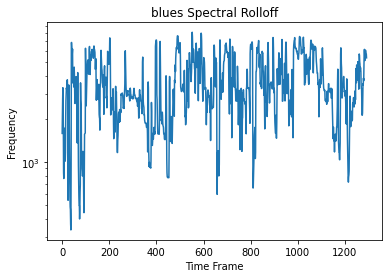

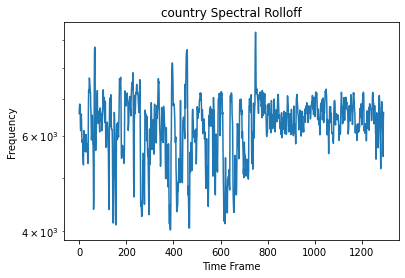

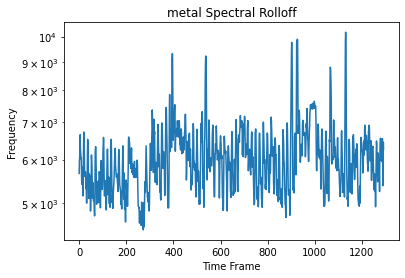

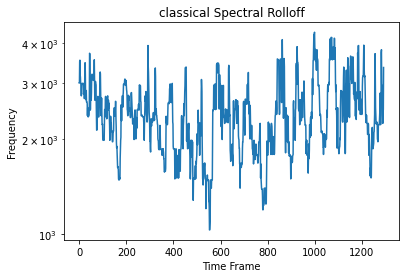

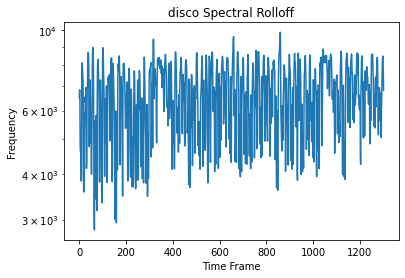

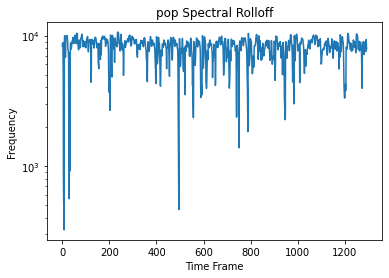

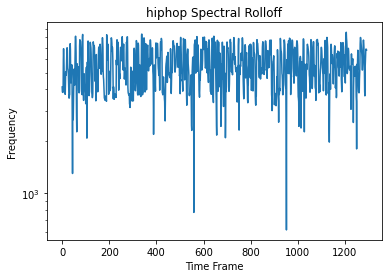

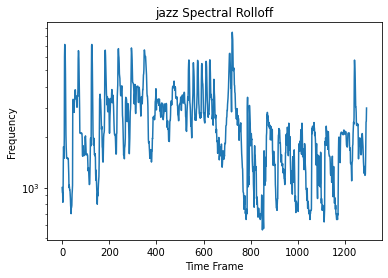

In [ ]:
# Computing spectral rolloff.
# for each folder

for folder in os.listdir(data_dir):
    if os.path.isfile(data_dir + folder):
        continue
    try:
        # read one audio file
        audio_file = data_dir + folder + '/' + folder + '.00001.wav'
        rate, audio = librosa.load(audio_file)
        # https://librosa.github.io/librosa/generated/librosa.feature.spectral_rolloff.html
        roll = librosa.feature.spectral_rolloff(y=rate, sr=audio)
    
        fig = plt.figure()
        plt.semilogy(roll.T, label="spectral rolloff")
        plt.ylabel("Frequency")
        plt.xlabel("Time Frame")
        plt.title(folder+" Spectral Rolloff")
        plt.show()
    except:
        pass

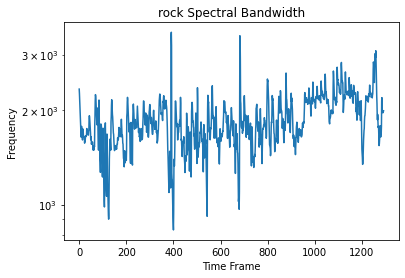

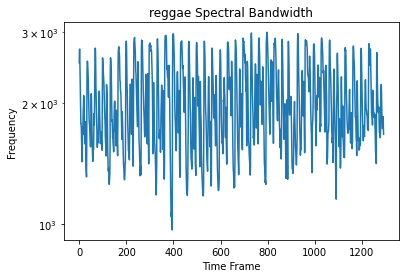

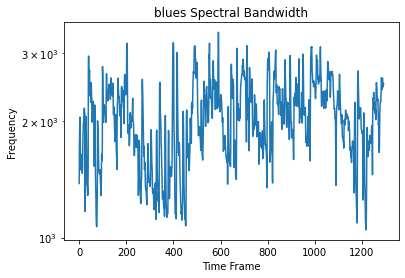

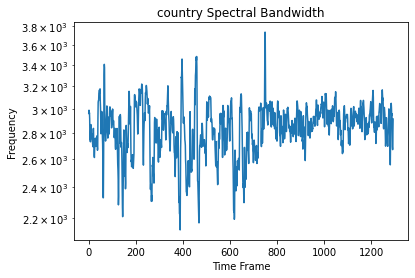

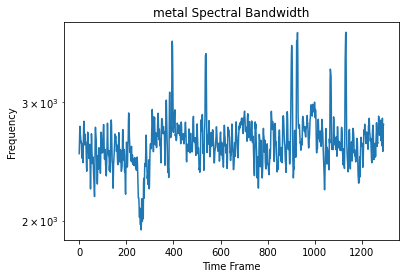

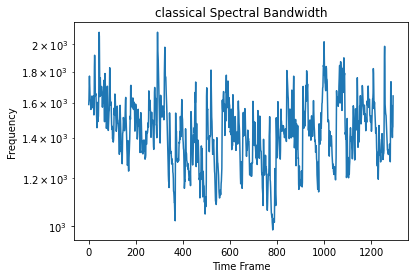

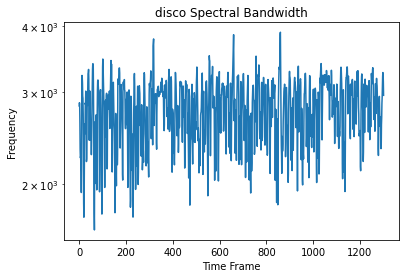

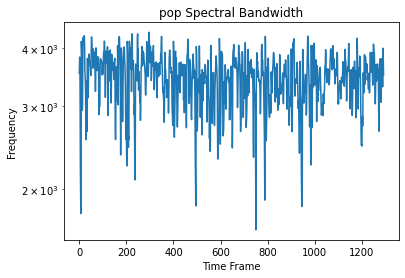

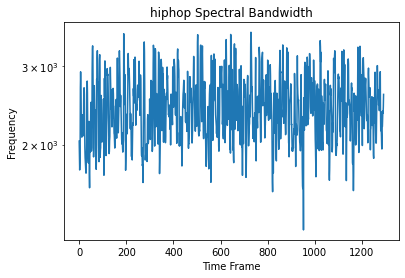

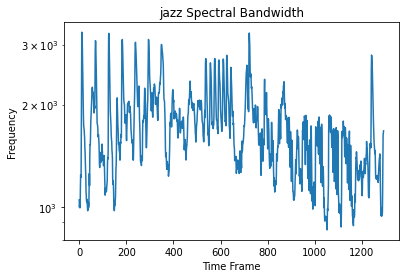

In [ ]:
# Computing spectral flatness.
# for each folder

for folder in os.listdir(data_dir):
    if os.path.isfile(data_dir + folder):
        continue
    try:
        # read one audio file
        audio_file = data_dir + folder + '/' + folder + '.00001.wav'
        rate, audio = librosa.load(audio_file)
        # https://librosa.github.io/librosa/generated/librosa.feature.spectral_bandwidth.html
        band = librosa.feature.spectral_bandwidth(y=rate, sr=audio)
    
        fig = plt.figure()
        plt.semilogy(band.T, label="spectral bandwidth")
        plt.ylabel("Frequency")
        plt.xlabel("Time Frame")
        plt.title(folder+" Spectral Bandwidth")
        plt.show()
    except:
        pass

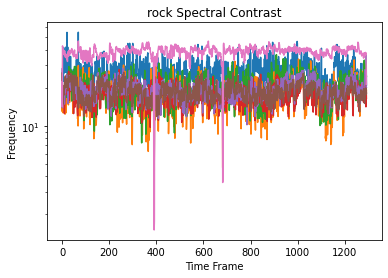

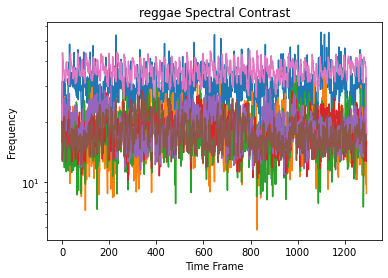

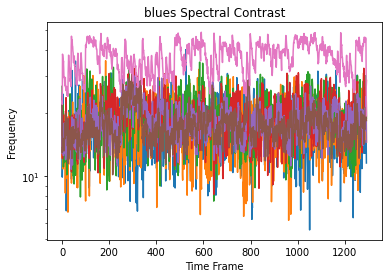

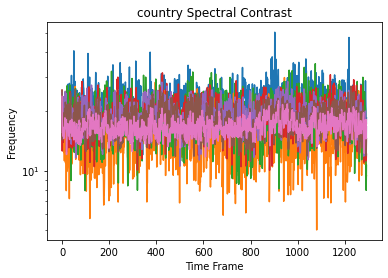

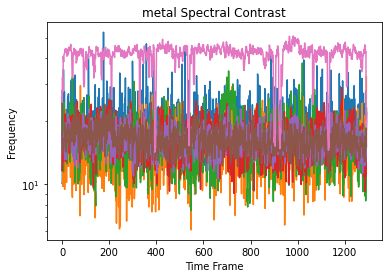

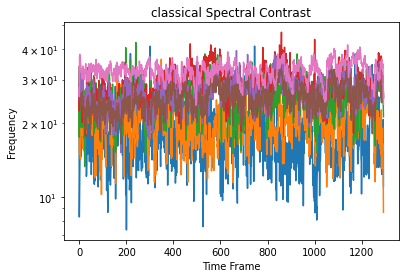

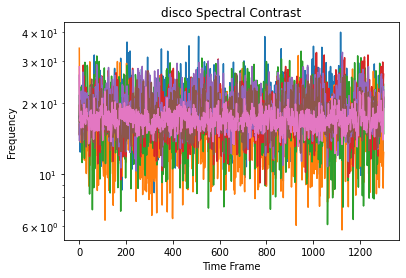

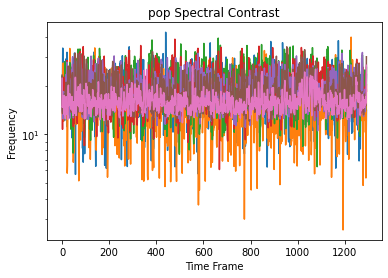

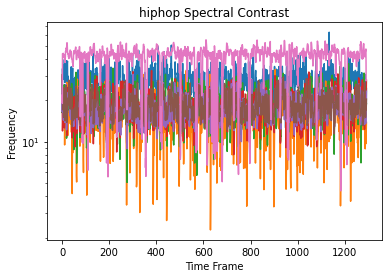

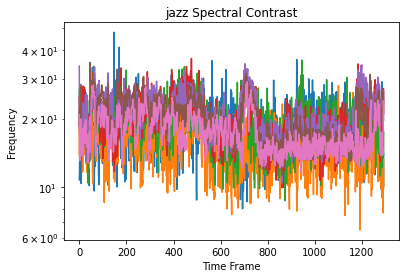

In [ ]:
# Computing spectral flatness.
# for each folder

for folder in os.listdir(data_dir):
    if os.path.isfile(data_dir + folder):
        continue
    try:
        # read one audio file
        audio_file = data_dir + folder + '/' + folder + '.00001.wav'
        rate, audio = librosa.load(audio_file)
        # https://librosa.github.io/librosa/generated/librosa.feature.spectral_contrast.html
        contra = librosa.feature.spectral_contrast(y=rate, sr=audio)
    
        fig = plt.figure()
        plt.semilogy(contra.T, label="spectral contrast")
        plt.ylabel("Frequency")
        plt.xlabel("Time Frame")
        plt.title(folder+" Spectral Contrast")
        plt.show()
    except:
        pass

## Featurization:

In [ ]:
# Generating labels.
labels = dict()
cnt = 0
# Loop through each class and assign a numerical value.
for folder in os.listdir(data_dir):
    if folder[0] == '.':
        continue
    labels[folder] = cnt
    cnt += 1
    
labels

{'blues': 2,
 'classical': 5,
 'country': 3,
 'disco': 6,
 'hiphop': 8,
 'jazz': 9,
 'metal': 4,
 'pop': 7,
 'reggae': 1,
 'rock': 0}

### FFT Features:

In [ ]:
# Generating FFT Feature function.
def getFFTFeatures(music, className):
    rate, audio = scipy.io.wavfile.read(music)
    
    fft_features = np.array(abs(scipy.fft.fft(audio)[:1000]))
    
    return fft_features, labels[className]

In [ ]:
fftFeatures = []
classes = []
for folder in os.listdir(data_dir):
    if os.path.isfile(data_dir + folder):
        continue
        # Loop through each file
    for filename in os.listdir(data_dir+folder+"/"):
        fft, label = getFFTFeatures(data_dir+folder+"/"+filename, folder)
        fftFeatures.append(fft)
        classes.append(label)

In [ ]:
print(len(fftFeatures))
print(len(classes))

1000
1000


In [ ]:
# Create a dataframe out of features and labels, shuffle them then store them.
df = pd.DataFrame(fftFeatures)
df['label'] = classes
df.reset_index(drop=True, inplace=True)
df.head()
df.to_csv(main_folder + "FFT_Features.csv", index=False)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,label
0,1867440.0,49383.652017,51520.294260,89551.593029,120776.442243,268000.854538,242944.374191,194729.144762,229117.853493,350534.772285,...,1.020116e+06,5.847609e+06,7.162474e+06,2.368292e+06,2.876267e+06,1.191506e+06,4.527746e+06,2.653710e+06,2.230348e+06,0
1,251325.0,732318.540725,847456.039505,551756.832772,451127.557183,708486.148464,688638.128449,268178.155061,486033.017159,749525.178170,...,3.280996e+06,3.224434e+06,1.410228e+06,1.669973e+06,3.107992e+06,5.362525e+06,3.611963e+06,2.119976e+06,1.416028e+06,0
2,485937.0,230614.962041,257291.324497,238579.106393,316563.779431,9186.392007,422521.182391,175270.215661,191436.802582,293083.542790,...,8.078740e+05,6.498839e+05,9.044376e+05,4.825925e+06,1.701938e+06,1.711791e+06,2.410126e+06,1.443396e+06,3.292413e+06,0
3,1606720.0,501959.599323,460239.539684,766413.334017,864907.986837,932921.594670,270012.345500,339297.535417,243226.695737,994266.107101,...,2.578569e+06,4.384622e+06,1.752046e+06,1.329947e+06,1.310551e+06,1.567227e+06,1.161753e+06,6.041731e+05,3.535413e+06,0
4,74747.0,247676.608683,140907.984524,194018.010884,171669.869687,178496.802284,236980.389889,130265.646902,239756.013467,105405.871244,...,1.528400e+06,3.678775e+06,1.124270e+06,2.232176e+06,3.487105e+06,3.072317e+06,2.283387e+06,1.730960e+06,1.231650e+06,0


In [ ]:
df = pd.read_csv(main_folder + "FFT_Features.csv")

### MFCC Features:

In [ ]:
def getMFCCFeatures(music):
    rate, audio = scipy.io.wavfile.read(music)
    
    # Get mfcc feature
    mfccFeatures = mfcc(audio)
    
    # our mfcc feature contains 13 values for each frame in our audio file.
    # the total number of frames is 4100 approx value. We want to reduce this as this would overwhelm our model.
    # To do this we ignore 10% starting and 10% ending song and take mean of all the frames
    frames = mfccFeatures.shape[0] # Get all frames
    mfccFeatures = np.mean(mfccFeatures[int(frames*0.1):int(frames*0.9)], axis = 0) # take mean
    
    # Return features
    return mfccFeatures

In [ ]:
mfccFeatures = []
for folder in os.listdir(data_dir):
    if os.path.isfile(data_dir + folder):
        continue
        # Loop through each file
    for filename in os.listdir(data_dir+folder+"/"):
        mfccFeat = getMFCCFeatures(data_dir+folder+"/"+filename)
        mfccFeatures.append(mfccFeat)

In [ ]:
print(len(mfccFeatures))

1000


In [ ]:
# Create a dataframe out of features and labels, shuffle them then store them.
df2 = pd.DataFrame(mfccFeatures)
df2['label'] = classes
df2.reset_index(drop=True, inplace=True)
df2.to_csv(main_folder + "MFCC_Features.csv", index=False)
df2.shape

(1000, 14)

In [ ]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,18.836363,-2.117213,-13.041657,8.027488,-11.056385,8.931692,-14.813567,8.004667,-15.683928,5.346216,-12.944814,5.522449,-9.167454,0
1,17.971606,4.776290,-5.344832,7.324102,-8.496927,16.097699,-6.502872,17.246624,-14.781375,4.820996,-9.747808,8.887700,-3.767929,0
2,18.951556,5.163095,-13.941209,8.464532,-7.924401,15.856836,-12.757722,8.245124,-15.322218,1.904860,-10.920444,6.950582,-6.768193,0
3,17.616080,13.024340,-5.484856,1.649966,-14.021676,12.241870,-4.460988,11.731554,-8.981487,2.470249,-12.453836,4.161146,-6.586580,0
4,20.783905,3.605757,-18.771829,-3.666066,-20.814814,13.628027,-14.271777,8.262304,-18.025282,4.765535,-7.162050,10.307202,-3.185866,0


In [ ]:
df2 = pd.read_csv(main_folder + "MFCC_Features.csv")

### LSTM Data:

In [ ]:
lstmFeatures = []
# Segment length = 10, music time = 30 samplesPerSegment = 22050 * 30 / 10
samplesPerSegment = (22050 * 3)
x = []
z = []
for folder in os.listdir(data_dir):
    if os.path.isfile(data_dir + folder):
        continue
      # Loop through each file
    for filename in os.listdir(data_dir+folder+"/"):
      y, sr = librosa.load(data_dir+folder+"/"+filename)

      # Get multiple segments from same audio.
      for i in range(10):
        ft = librosa.feature.mfcc(y[samplesPerSegment * i: samplesPerSegment * (i+1)], n_mfcc=40, hop_length=512, n_fft=2048)
        ft = ft.T

        if len(ft) == math.ceil(samplesPerSegment/512):
          x.append(ft)
          z.append(labels[folder])

In [ ]:
with open(main_folder + "LSTMFeatures.pkl", "wb") as f:
  pickle.dump(x, f)

with open(main_folder + "LSTMLabels.pkl", "wb") as f:
  pickle.dump(z, f)

## Train Test Split:

In [ ]:
df = pd.read_csv(main_folder + "FFT_Features.csv")

In [ ]:
df2 = pd.read_csv(main_folder + "MFCC_Features.csv")

In [5]:
with open(main_folder + "LSTMFeatures.pkl", "rb") as f:
  LSTMFeatures = pickle.load(f)

with open(main_folder+ "LSTMLabels.pkl", "rb") as f:
  LSTMLabels = pickle.load(f)

In [ ]:
trainFFT, testFFT, trainFFTLabel, testFFTLabel = train_test_split(df.loc[:, df.columns != 'label'], df['label'], random_state=0)

In [ ]:
trainMFCC, testMFCC, trainMFCCLabel, testMFCCLabel = train_test_split(df2.loc[:, df2.columns != 'label'], df2['label'], random_state=0)

In [6]:
trainLSTM, testLSTM, trainLSTMLabel, testLSTMLabel = train_test_split(np.array(LSTMFeatures), np.array(LSTMLabels), random_state=0)

In [7]:
# Converting data into CNN Format.
LSTMFeatures = np.array(LSTMFeatures)
CNNFeatures = LSTMFeatures.reshape(LSTMFeatures.shape[0], LSTMFeatures.shape[1], LSTMFeatures.shape[2], 1)
CNNLabels = to_categorical(LSTMLabels, num_classes=10)

In [8]:
trainCNN, testCNN, trainCNNLabel, testCNNLabel = train_test_split(np.array(CNNFeatures), np.array(CNNLabels), random_state=0)

## FFT Featurization Models:

#### Logistic Regression

In [ ]:
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
for c in C:
  lr = LogisticRegression(C=c, max_iter=500)
  lr.fit(trainFFT, trainFFTLabel)
  preds = lr.predict(testFFT)
  print("\n" + str(c) + "\n")
  print(classification_report(testFFTLabel, preds))


1e-05

              precision    recall  f1-score   support

           0       0.17      0.19      0.18        21
           1       0.12      0.19      0.15        16
           2       0.52      0.37      0.43        30
           3       0.17      0.23      0.20        26
           4       0.21      0.11      0.14        28
           5       0.56      0.73      0.63        26
           6       0.07      0.04      0.05        27
           7       0.27      0.31      0.29        26
           8       0.20      0.25      0.22        20
           9       0.48      0.47      0.47        30

    accuracy                           0.30       250
   macro avg       0.28      0.29      0.28       250
weighted avg       0.29      0.30      0.29       250


0.0001

              precision    recall  f1-score   support

           0       0.13      0.14      0.14        21
           1       0.06      0.12      0.08        16
           2       0.43      0.40      0.41        30
       

#### SVC:

In [ ]:
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
for c in C:
  svc = SVC(C=c)
  svc.fit(trainFFT, trainFFTLabel)
  preds = svc.predict(testFFT)
  print("\n" + str(c) + "\n")
  print(classification_report(testFFTLabel, preds))


1e-05

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.06      1.00      0.12        16
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        28
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        30

    accuracy                           0.06       250
   macro avg       0.01      0.10      0.01       250
weighted avg       0.00      0.06      0.01       250


0.0001

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.06      1.00      0.12        16
           2       0.00      0.00      0.00        30
       

#### Decision Tree:

In [ ]:
max_depth = [3, 5, 7, 9, 11, 13, 17, 25, 50]
for md in max_depth:
  dt = DecisionTreeClassifier(max_depth=md)
  dt.fit(trainFFT, trainFFTLabel)
  preds = dt.predict(testFFT)
  print("\n" + str(md) + "\n")
  print(classification_report(testFFTLabel, preds))


3

              precision    recall  f1-score   support

           0       0.12      0.48      0.20        21
           1       0.00      0.00      0.00        16
           2       1.00      0.07      0.12        30
           3       0.14      0.31      0.19        26
           4       0.00      0.00      0.00        28
           5       0.71      0.19      0.30        26
           6       0.00      0.00      0.00        27
           7       0.21      0.58      0.30        26
           8       0.00      0.00      0.00        20
           9       0.26      0.23      0.25        30

    accuracy                           0.19       250
   macro avg       0.24      0.19      0.14       250
weighted avg       0.27      0.19      0.14       250


5

              precision    recall  f1-score   support

           0       0.16      0.38      0.23        21
           1       0.10      0.19      0.13        16
           2       0.43      0.20      0.27        30
           3    

#### RandomForestClassifier:

In [ ]:
max_depth = [3, 5, 7, 9]
n_es = [300, 500, 700, 900]
for md in max_depth:
  for es in n_es:
    rf = RandomForestClassifier(max_depth=md, n_estimators=es)
    rf.fit(trainFFT, trainFFTLabel)
    preds = rf.predict(testFFT)
    print("\n" + str(md) + ", " +str(es) + "\n")
    print(classification_report(testFFTLabel, preds))


3, 300

              precision    recall  f1-score   support

           0       0.24      0.19      0.21        21
           1       0.17      0.56      0.26        16
           2       0.67      0.20      0.31        30
           3       0.27      0.12      0.16        26
           4       0.00      0.00      0.00        28
           5       0.53      0.88      0.67        26
           6       0.00      0.00      0.00        27
           7       0.30      0.73      0.43        26
           8       0.20      0.15      0.17        20
           9       0.31      0.40      0.35        30

    accuracy                           0.32       250
   macro avg       0.27      0.32      0.26       250
weighted avg       0.28      0.32      0.26       250


3, 500

              precision    recall  f1-score   support

           0       0.32      0.33      0.33        21
           1       0.13      0.38      0.19        16
           2       0.75      0.20      0.32        30
      

#### XGBClassifier:

In [ ]:
max_depth = [3, 5, 7, 9]
for md in max_depth:
  xgb = XGBClassifier(max_depth=md, n_estimators=es)
  xgb.fit(trainFFT, trainFFTLabel)
  preds = xgb.predict(testFFT)
  print("\n" + str(md) + "\n")
  print(classification_report(testFFTLabel, preds))


3

              precision    recall  f1-score   support

           0       0.45      0.71      0.56        21
           1       0.18      0.25      0.21        16
           2       0.53      0.33      0.41        30
           3       0.41      0.35      0.38        26
           4       0.45      0.18      0.26        28
           5       0.74      0.88      0.81        26
           6       0.32      0.33      0.33        27
           7       0.44      0.58      0.50        26
           8       0.41      0.55      0.47        20
           9       0.48      0.37      0.42        30

    accuracy                           0.45       250
   macro avg       0.44      0.45      0.43       250
weighted avg       0.45      0.45      0.44       250


5

              precision    recall  f1-score   support

           0       0.50      0.76      0.60        21
           1       0.21      0.31      0.25        16
           2       0.63      0.40      0.49        30
           3    

#### MLP:

In [ ]:
## Tensors
trainFFTTensor = torch.tensor(np.array(trainFFT))
trainFFTLabelTensor = torch.tensor(np.array(trainFFTLabel))

testFFTTensor = torch.tensor(np.array(testFFT))
testFFTLabelTensor = torch.tensor(np.array(testFFTLabel))

In [ ]:
# Pytorch data adapters and sampler to create batches of data
BS = 64
trainFFTDataset = TensorDataset(trainFFTTensor, trainFFTLabelTensor)
trainSampler = RandomSampler(trainFFTTensor)
trainLoader = DataLoader(trainFFTDataset, sampler=trainSampler, batch_size=BS)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim=1000, output_dim=10):
        super().__init__()

        self.l1 = nn.Linear(input_dim, 512)
        self.l2 = nn.Linear(512, 256)
        self.l3 = nn.Linear(256, 128)
        self.l4 = nn.Linear(128, output_dim)
        self.l5 = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.l1(x)
        x = self.l2(x)
        x = self.l3(x)
        x = self.l4(x)
        preds = self.l5(x)

        return preds

In [ ]:
model = MLP()
optimizer = optim.Adam(model.parameters())
criterion = nn.NLLLoss()

In [ ]:
def train(model):
  # Training.
  model.train()
  trainLoss = 0
  trainAcc = 0
  trainPredictions = []
  trainReal = []
  for iteration, trainD in enumerate(trainLoader):
    data, labels = trainD
    # data = data.to('cuda')
    # mask = mask.to('cuda')
    # labels = labels.to('cuda')    
    model.zero_grad()
    optimizer.zero_grad()
    predictions = model(data.float())
    trainPredictions.extend(list(predictions.detach().cpu().numpy()))
    trainReal.extend(list(labels.detach().cpu().numpy()))
    batchLoss = criterion(predictions, labels)
    trainLoss += batchLoss.item()
    batchLoss.backward()
    optimizer.step()
  
  trainPredictions = np.array(trainPredictions).argmax(axis=1)
  trainLoss /= len(trainLoader)
  trainAcc = sum(np.array(trainPredictions) == np.array(trainReal))/len(trainReal)
  trainReport = classification_report(trainReal, trainPredictions)

  model.eval()
  testAcc = 0
  with torch.no_grad():
    predictions = model(testFFTTensor.float())
    predictions = predictions.detach().cpu().numpy()
    predictions = predictions.argmax(axis=1)
  testReport = classification_report(testFFTLabelTensor.detach().cpu().numpy(), predictions)
  testAcc = sum(predictions == testFFTLabelTensor.detach().cpu().numpy())/predictions.shape[0]

  return trainLoss, trainReport, testReport

In [ ]:
for e in range(10):
  x, y, z = train(model)
  print(y)
  print(z)
  print("\n****\n")

              precision    recall  f1-score   support

           0       0.08      0.08      0.08        79
           1       0.17      0.19      0.18        84
           2       0.11      0.10      0.11        70
           3       0.10      0.07      0.08        74
           4       0.16      0.17      0.16        72
           5       0.20      0.22      0.21        74
           6       0.11      0.14      0.12        73
           7       0.13      0.18      0.15        74
           8       0.12      0.14      0.13        80
           9       0.19      0.10      0.13        70

    accuracy                           0.14       750
   macro avg       0.14      0.14      0.13       750
weighted avg       0.14      0.14      0.14       750

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        16
           2       0.50      0.10      0.17        30
           3       0.00 

## MFCC Featurization Models:

#### Logistic Regression:

In [ ]:
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
for c in C:
  lr = LogisticRegression(C=c, max_iter=500)
  lr.fit(trainMFCC, trainMFCCLabel)
  preds = lr.predict(testMFCC)
  print("\n" + str(c) + "\n")
  print(classification_report(testMFCCLabel, preds))


1e-05

              precision    recall  f1-score   support

           0       0.19      0.24      0.21        21
           1       0.18      0.62      0.28        16
           2       0.67      0.20      0.31        30
           3       0.00      0.00      0.00        26
           4       0.53      0.89      0.67        28
           5       0.49      1.00      0.66        26
           6       0.00      0.00      0.00        27
           7       0.43      0.88      0.57        26
           8       0.40      0.10      0.16        20
           9       0.00      0.00      0.00        30

    accuracy                           0.39       250
   macro avg       0.29      0.39      0.29       250
weighted avg       0.29      0.39      0.29       250


0.0001

              precision    recall  f1-score   support

           0       0.10      0.05      0.06        21
           1       0.21      0.31      0.25        16
           2       0.33      0.43      0.38        30
       

#### SVC:

In [ ]:
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
for c in C:
  svc = SVC(C=c)
  svc.fit(trainMFCC, trainMFCCLabel)
  preds = svc.predict(testMFCC)
  print("\n" + str(c) + "\n")
  print(classification_report(testMFCCLabel, preds))


1e-05

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.06      1.00      0.12        16
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        28
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        30

    accuracy                           0.06       250
   macro avg       0.01      0.10      0.01       250
weighted avg       0.00      0.06      0.01       250


0.0001

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.06      1.00      0.12        16
           2       0.00      0.00      0.00        30
       

#### Decision Tree:

In [ ]:
max_depth = [3, 5, 7, 9, 11, 13, 17, 25, 50]
for md in max_depth:
  dt = DecisionTreeClassifier(max_depth=md)
  dt.fit(trainMFCC, trainMFCCLabel)
  preds = dt.predict(testMFCC)
  print("\n" + str(md) + "\n")
  print(classification_report(testMFCCLabel, preds))


3

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        16
           2       0.40      0.07      0.11        30
           3       0.26      0.35      0.30        26
           4       0.36      0.82      0.50        28
           5       0.50      0.77      0.61        26
           6       0.00      0.00      0.00        27
           7       0.50      0.65      0.57        26
           8       0.19      0.60      0.29        20
           9       0.00      0.00      0.00        30

    accuracy                           0.33       250
   macro avg       0.22      0.33      0.24       250
weighted avg       0.23      0.33      0.25       250


5

              precision    recall  f1-score   support

           0       0.12      0.29      0.16        21
           1       0.21      0.31      0.25        16
           2       0.33      0.13      0.19        30
           3    

#### RandomForestClassifier:

In [ ]:
max_depth = [3, 5, 7, 9]
n_es = [300, 500, 700, 900]
for md in max_depth:
  for es in n_es:
    rf = RandomForestClassifier(max_depth=md, n_estimators=es)
    rf.fit(trainMFCC, trainMFCCLabel)
    preds = rf.predict(testMFCC)
    print("\n" + str(md) + ", " +str(es) + "\n")
    print(classification_report(testMFCCLabel, preds))


3, 300

              precision    recall  f1-score   support

           0       0.25      0.14      0.18        21
           1       0.27      0.50      0.35        16
           2       0.41      0.40      0.41        30
           3       0.50      0.08      0.13        26
           4       0.48      0.89      0.62        28
           5       0.59      1.00      0.74        26
           6       0.00      0.00      0.00        27
           7       0.44      0.92      0.60        26
           8       0.27      0.20      0.23        20
           9       0.38      0.10      0.16        30

    accuracy                           0.43       250
   macro avg       0.36      0.42      0.34       250
weighted avg       0.37      0.43      0.35       250


3, 500

              precision    recall  f1-score   support

           0       0.11      0.05      0.07        21
           1       0.31      0.56      0.40        16
           2       0.42      0.43      0.43        30
      

#### XGBClassifier:

In [ ]:
max_depth = [3, 5, 7, 9]
for md in max_depth:
  xgb = XGBClassifier(max_depth=md, n_estimators=es)
  xgb.fit(trainMFCC, trainMFCCLabel)
  preds = xgb.predict(testMFCC)
  print("\n" + str(md) + "\n")
  print(classification_report(testMFCCLabel, preds))


3

              precision    recall  f1-score   support

           0       0.29      0.33      0.31        21
           1       0.26      0.50      0.34        16
           2       0.62      0.60      0.61        30
           3       0.52      0.46      0.49        26
           4       0.76      0.68      0.72        28
           5       0.86      0.96      0.91        26
           6       0.39      0.26      0.31        27
           7       0.71      0.77      0.74        26
           8       0.35      0.35      0.35        20
           9       0.52      0.40      0.45        30

    accuracy                           0.54       250
   macro avg       0.53      0.53      0.52       250
weighted avg       0.55      0.54      0.54       250


5

              precision    recall  f1-score   support

           0       0.35      0.33      0.34        21
           1       0.27      0.44      0.33        16
           2       0.62      0.67      0.65        30
           3    

#### MLP:

In [ ]:
## Tensors
trainMFCCTensor = torch.tensor(np.array(trainMFCC))
trainMFCCLabelTensor = torch.tensor(np.array(trainMFCCLabel))

testMFCCTensor = torch.tensor(np.array(testMFCC))
testMFCCLabelTensor = torch.tensor(np.array(testMFCCLabel))


# Pytorch data adapters and sampler to create batches of data
BS = 64
trainMFCCDataset = TensorDataset(trainMFCCTensor, trainMFCCLabelTensor)
trainSampler = RandomSampler(trainMFCCTensor)
trainLoader = DataLoader(trainMFCCDataset, sampler=trainSampler, batch_size=BS)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim=13, output_dim=10):
        super().__init__()

        self.l1 = nn.Linear(input_dim, 10)
        self.l2 = nn.Linear(10, 10)
        self.l3 = nn.Linear(10, output_dim)
        self.l4 = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.l1(x)
        x = self.l2(x)
        x = self.l3(x)
        preds = self.l4(x)

        return preds

In [ ]:
model = MLP()
optimizer = optim.Adam(model.parameters())
criterion = nn.NLLLoss()

In [ ]:
def train(model):
  # Training.
  model.train()
  trainLoss = 0
  trainAcc = 0
  trainPredictions = []
  trainReal = []
  for iteration, trainD in enumerate(trainLoader):
    data, labels = trainD
    # data = data.to('cuda')
    # mask = mask.to('cuda')
    # labels = labels.to('cuda')    
    model.zero_grad()
    optimizer.zero_grad()
    predictions = model(data.float())
    trainPredictions.extend(list(predictions.detach().cpu().numpy()))
    trainReal.extend(list(labels.detach().cpu().numpy()))
    batchLoss = criterion(predictions, labels)
    trainLoss += batchLoss.item()
    batchLoss.backward()
    optimizer.step()
  
  trainPredictions = np.array(trainPredictions).argmax(axis=1)
  trainLoss /= len(trainLoader)
  trainAcc = sum(np.array(trainPredictions) == np.array(trainReal))/len(trainReal)
  trainReport = classification_report(trainReal, trainPredictions)

  model.eval()
  testAcc = 0
  with torch.no_grad():
    predictions = model(testMFCCTensor.float())
    predictions = predictions.detach().cpu().numpy()
    predictions = predictions.argmax(axis=1)
  testReport = classification_report(testMFCCLabelTensor.detach().cpu().numpy(), predictions)
  testAcc = sum(predictions == testMFCCLabelTensor.detach().cpu().numpy())/predictions.shape[0]

  return trainLoss, trainReport, testReport

In [ ]:
for e in range(1000):
  x, y, z = train(model)

In [ ]:
print(z)

              precision    recall  f1-score   support

           0       0.19      0.19      0.19        21
           1       0.24      0.50      0.32        16
           2       0.46      0.43      0.45        30
           3       0.55      0.42      0.48        26
           4       0.63      0.79      0.70        28
           5       0.86      0.92      0.89        26
           6       0.50      0.30      0.37        27
           7       0.77      0.88      0.82        26
           8       0.39      0.35      0.37        20
           9       0.60      0.40      0.48        30

    accuracy                           0.53       250
   macro avg       0.52      0.52      0.51       250
weighted avg       0.54      0.53      0.52       250



## RNN Based Models:

#### LSTM:

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(LSTMFeatures.shape[1], LSTMFeatures.shape[2]), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
optimizer = Adam()
model.compile(optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(trainLSTM, trainLSTMLabel, validation_split=0.2, epochs=50, batch_size=128)

Epoch 1/50
47/47 [==============================] - 33s 92ms/step - loss: 1.9649 - accuracy: 0.3090 - val_loss: 1.6286 - val_accuracy: 0.4013
Epoch 2/50
47/47 [==============================] - 3s 69ms/step - loss: 1.4845 - accuracy: 0.4684 - val_loss: 1.4351 - val_accuracy: 0.4807
Epoch 3/50
47/47 [==============================] - 3s 71ms/step - loss: 1.2865 - accuracy: 0.5399 - val_loss: 1.3009 - val_accuracy: 0.5380
Epoch 4/50
47/47 [==============================] - 3s 69ms/step - loss: 1.2050 - accuracy: 0.5738 - val_loss: 1.2412 - val_accuracy: 0.5767
Epoch 5/50
47/47 [==============================] - 3s 69ms/step - loss: 1.0740 - accuracy: 0.6233 - val_loss: 1.1839 - val_accuracy: 0.5847
Epoch 6/50
47/47 [==============================] - 3s 69ms/step - loss: 0.9739 - accuracy: 0.6542 - val_loss: 1.0858 - val_accuracy: 0.6227
Epoch 7/50
47/47 [==============================] - 3s 70ms/step - loss: 0.9193 - accuracy: 0.6773 - val_loss: 1.0930 - val_accuracy: 0.6207
Epoch 8/50
4

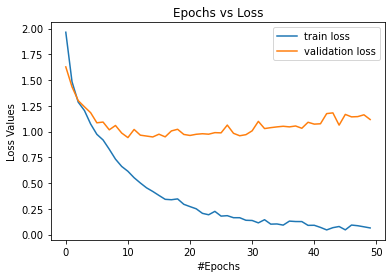

In [ ]:
plt.plot(range(len(hist.history['val_loss'])), hist.history['loss'], label='train loss')
plt.plot(range(len(hist.history['val_loss'])), hist.history['val_loss'], label='validation loss')
plt.xlabel("#Epochs")
plt.ylabel("Loss Values")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

In [ ]:
print(classification_report(testLSTMLabel, model.predict(testLSTM).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.68      0.56      0.61       236
           1       0.73      0.76      0.75       247
           2       0.78      0.85      0.81       266
           3       0.65      0.62      0.63       224
           4       0.88      0.89      0.89       261
           5       0.89      0.90      0.90       261
           6       0.74      0.71      0.72       248
           7       0.77      0.84      0.80       241
           8       0.72      0.72      0.72       258
           9       0.77      0.79      0.78       257

    accuracy                           0.77      2499
   macro avg       0.76      0.76      0.76      2499
weighted avg       0.76      0.77      0.77      2499



In [ ]:
model.save(main_folder + 'LSTMModel.h5')

In [11]:
pqr = keras.models.load_model(main_folder + 'LSTMModel.h5')

In [12]:
print(classification_report(testLSTMLabel, pqr.predict(testLSTM).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.68      0.56      0.61       236
           1       0.73      0.76      0.75       247
           2       0.78      0.85      0.81       266
           3       0.65      0.62      0.63       224
           4       0.88      0.89      0.89       261
           5       0.89      0.90      0.90       261
           6       0.74      0.71      0.72       248
           7       0.77      0.84      0.80       241
           8       0.72      0.72      0.72       258
           9       0.77      0.79      0.78       257

    accuracy                           0.77      2499
   macro avg       0.76      0.76      0.76      2499
weighted avg       0.76      0.77      0.77      2499



#### GRU:

In [ ]:
model2 = Sequential()
model2.add(GRU(64, input_shape=(LSTMFeatures.shape[1], LSTMFeatures.shape[2]), return_sequences=True))
model2.add(GRU(64))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))
optimizer = Adam()
model2.compile(optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model2.fit(trainLSTM, trainLSTMLabel, validation_split=0.2, epochs=30, batch_size=128)

Epoch 1/30
47/47 [==============================] - 8s 84ms/step - loss: 2.0521 - accuracy: 0.2810 - val_loss: 1.8370 - val_accuracy: 0.3527
Epoch 2/30
47/47 [==============================] - 3s 67ms/step - loss: 1.6318 - accuracy: 0.4242 - val_loss: 1.5242 - val_accuracy: 0.4460
Epoch 3/30
47/47 [==============================] - 3s 67ms/step - loss: 1.3545 - accuracy: 0.5141 - val_loss: 1.3402 - val_accuracy: 0.5253
Epoch 4/30
47/47 [==============================] - 3s 66ms/step - loss: 1.1544 - accuracy: 0.5873 - val_loss: 1.2473 - val_accuracy: 0.5447
Epoch 5/30
47/47 [==============================] - 3s 68ms/step - loss: 1.0020 - accuracy: 0.6475 - val_loss: 1.1367 - val_accuracy: 0.6027
Epoch 6/30
47/47 [==============================] - 3s 63ms/step - loss: 0.8742 - accuracy: 0.6943 - val_loss: 1.0618 - val_accuracy: 0.6427
Epoch 7/30
47/47 [==============================] - 3s 63ms/step - loss: 0.7907 - accuracy: 0.7237 - val_loss: 1.0494 - val_accuracy: 0.6360
Epoch 8/30
47

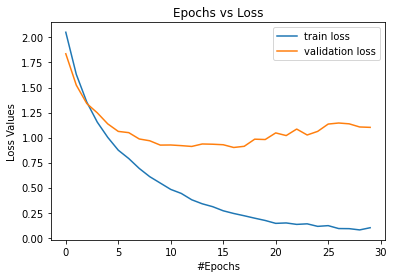

In [ ]:
plt.plot(range(len(hist.history['val_loss'])), hist.history['loss'], label='train loss')
plt.plot(range(len(hist.history['val_loss'])), hist.history['val_loss'], label='validation loss')
plt.xlabel("#Epochs")
plt.ylabel("Loss Values")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

In [ ]:
print(classification_report(testLSTMLabel, model2.predict(testLSTM).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       236
           1       0.66      0.72      0.68       247
           2       0.89      0.63      0.74       266
           3       0.60      0.70      0.65       224
           4       0.90      0.89      0.90       261
           5       0.85      0.90      0.88       261
           6       0.70      0.68      0.69       248
           7       0.80      0.80      0.80       241
           8       0.73      0.75      0.74       258
           9       0.76      0.77      0.77       257

    accuracy                           0.75      2499
   macro avg       0.75      0.74      0.74      2499
weighted avg       0.75      0.75      0.75      2499



In [ ]:
model2.save(main_folder + 'GRUModel.h5')

In [ ]:
pqr = keras.models.load_model(main_folder + 'GRUModel.h5')
print(classification_report(testLSTMLabel, pqr.predict(testLSTM).argmax(axis=1)))

#### Bidirectional GRU:

In [ ]:
model3 = Sequential()
model3.add(Bidirectional(GRU(32, input_shape=(LSTMFeatures.shape[1], LSTMFeatures.shape[2]), return_sequences=True)))
model3.add(Bidirectional(GRU(32)))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(10, activation='softmax'))
optimizer = Adam()
model3.compile(optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model3.fit(trainLSTM, trainLSTMLabel, validation_split=0.2, epochs=30, batch_size=128)

Epoch 1/30
47/47 [==============================] - 27s 197ms/step - loss: 2.2203 - accuracy: 0.2006 - val_loss: 2.1031 - val_accuracy: 0.2613
Epoch 2/30
47/47 [==============================] - 6s 122ms/step - loss: 1.9400 - accuracy: 0.3193 - val_loss: 1.7805 - val_accuracy: 0.3680
Epoch 3/30
47/47 [==============================] - 6s 119ms/step - loss: 1.6039 - accuracy: 0.4200 - val_loss: 1.5621 - val_accuracy: 0.4333
Epoch 4/30
47/47 [==============================] - 6s 118ms/step - loss: 1.3956 - accuracy: 0.5003 - val_loss: 1.4406 - val_accuracy: 0.4887
Epoch 5/30
47/47 [==============================] - 6s 118ms/step - loss: 1.2495 - accuracy: 0.5518 - val_loss: 1.3487 - val_accuracy: 0.5127
Epoch 6/30
47/47 [==============================] - 6s 118ms/step - loss: 1.1320 - accuracy: 0.5975 - val_loss: 1.2646 - val_accuracy: 0.5553
Epoch 7/30
47/47 [==============================] - 5s 117ms/step - loss: 1.0249 - accuracy: 0.6345 - val_loss: 1.1944 - val_accuracy: 0.5887
Epoch

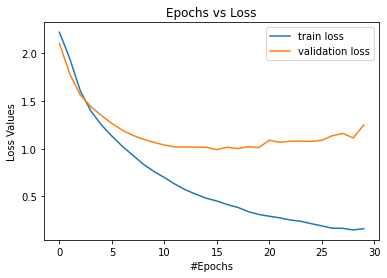

In [ ]:
plt.plot(range(len(hist.history['val_loss'])), hist.history['loss'], label='train loss')
plt.plot(range(len(hist.history['val_loss'])), hist.history['val_loss'], label='validation loss')
plt.xlabel("#Epochs")
plt.ylabel("Loss Values")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

In [ ]:
print(classification_report(testLSTMLabel, model3.predict(testLSTM).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.45      0.60      0.51       236
           1       0.66      0.72      0.69       247
           2       0.80      0.63      0.71       266
           3       0.51      0.64      0.57       224
           4       0.92      0.80      0.86       261
           5       0.92      0.86      0.89       261
           6       0.70      0.59      0.64       248
           7       0.77      0.78      0.78       241
           8       0.69      0.70      0.70       258
           9       0.76      0.68      0.72       257

    accuracy                           0.70      2499
   macro avg       0.72      0.70      0.71      2499
weighted avg       0.72      0.70      0.71      2499



In [ ]:
model3.save(main_folder + 'BiGRUModel.h5')

In [ ]:
pqr = keras.models.load_model(main_folder + 'BiGRUModel.h5')
print(classification_report(testLSTMLabel, pqr.predict(testLSTM).argmax(axis=1)))

## CNN:

#### CNN Model 1:

In [ ]:
model4 = Sequential()
model4.add(Conv2D(64, (3,3), activation='relu', padding='valid', input_shape=(trainCNN.shape[1:])))
model4.add(MaxPooling2D((2,2), padding='same'))
model4.add(Dropout(0.3))
model4.add(Conv2D(64, (3,3), activation='relu', padding='valid'))
model4.add(MaxPooling2D((2,2), padding='same'))
model4.add(Dropout(0.3))
model4.add(Conv2D(64, (3,3), activation='relu', padding='valid'))
model4.add(GlobalAveragePooling2D())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(10, activation='softmax'))
optimizer = Adam()
model4.compile(optimizer,loss='categorical_crossentropy', metrics=['accuracy'])
hist = model4.fit(trainCNN, trainCNNLabel, validation_split=0.2, epochs=30, batch_size=128)

Epoch 1/30
47/47 [==============================] - 18s 99ms/step - loss: 1.9919 - accuracy: 0.2855 - val_loss: 1.5967 - val_accuracy: 0.4133
Epoch 2/30
47/47 [==============================] - 3s 67ms/step - loss: 1.5228 - accuracy: 0.4424 - val_loss: 1.4350 - val_accuracy: 0.4673
Epoch 3/30
47/47 [==============================] - 3s 64ms/step - loss: 1.3613 - accuracy: 0.5141 - val_loss: 1.3463 - val_accuracy: 0.5200
Epoch 4/30
47/47 [==============================] - 3s 65ms/step - loss: 1.2368 - accuracy: 0.5538 - val_loss: 1.3356 - val_accuracy: 0.5000
Epoch 5/30
47/47 [==============================] - 3s 64ms/step - loss: 1.1966 - accuracy: 0.5716 - val_loss: 1.1964 - val_accuracy: 0.5580
Epoch 6/30
47/47 [==============================] - 3s 66ms/step - loss: 1.1382 - accuracy: 0.5925 - val_loss: 1.1340 - val_accuracy: 0.5780
Epoch 7/30
47/47 [==============================] - 3s 64ms/step - loss: 1.0761 - accuracy: 0.6258 - val_loss: 1.0946 - val_accuracy: 0.5953
Epoch 8/30
4

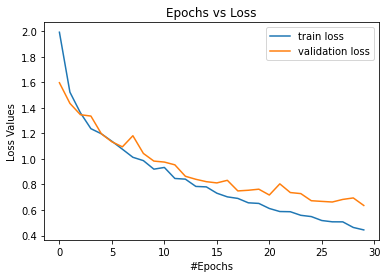

In [ ]:
plt.plot(range(len(hist.history['val_loss'])), hist.history['loss'], label='train loss')
plt.plot(range(len(hist.history['val_loss'])), hist.history['val_loss'], label='validation loss')
plt.xlabel("#Epochs")
plt.ylabel("Loss Values")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

In [ ]:
print(classification_report(testCNNLabel.argmax(axis=1), model4.predict(testCNN).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.72      0.54      0.62       236
           1       0.82      0.72      0.77       247
           2       0.89      0.77      0.82       266
           3       0.60      0.85      0.71       224
           4       0.90      0.93      0.91       261
           5       0.92      0.93      0.92       261
           6       0.76      0.72      0.74       248
           7       0.87      0.74      0.80       241
           8       0.78      0.90      0.83       258
           9       0.78      0.88      0.83       257

    accuracy                           0.80      2499
   macro avg       0.80      0.80      0.80      2499
weighted avg       0.81      0.80      0.80      2499



In [ ]:
model4.save(main_folder + 'CNNModel1.h5')

In [ ]:
pqr = keras.models.load_model(main_folder + 'CNNModel1.h5')
print(classification_report(testCNNLabel.argmax(axis=1), pqr.predict(testCNN).argmax(axis=1)))

#### CNN Model 2:

In [ ]:
model5 = Sequential()
model5.add(Conv2D(128, (3,3), activation='relu', padding='valid', input_shape=(trainCNN.shape[1:])))
model5.add(MaxPooling2D((3,3), padding='same'))
model5.add(Dropout(0.3))
model5.add(Conv2D(128, (3,3), activation='relu', padding='valid'))
model5.add(MaxPooling2D((2,2), padding='same'))
model5.add(Dropout(0.3))
model5.add(Conv2D(128, (3,3), activation='relu', padding='valid'))
model5.add(GlobalAveragePooling2D())
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(10, activation='softmax'))
optimizer = Adam()
model5.compile(optimizer,loss='categorical_crossentropy', metrics=['accuracy'])
hist = model5.fit(trainCNN, trainCNNLabel, validation_split=0.2, epochs=30, batch_size=128)

Epoch 1/30
47/47 [==============================] - 7s 113ms/step - loss: 2.0485 - accuracy: 0.2610 - val_loss: 1.6593 - val_accuracy: 0.3673
Epoch 2/30
47/47 [==============================] - 4s 94ms/step - loss: 1.6035 - accuracy: 0.4075 - val_loss: 1.4600 - val_accuracy: 0.4627
Epoch 3/30
47/47 [==============================] - 4s 95ms/step - loss: 1.3941 - accuracy: 0.4796 - val_loss: 1.3838 - val_accuracy: 0.4767
Epoch 4/30
47/47 [==============================] - 4s 94ms/step - loss: 1.2815 - accuracy: 0.5263 - val_loss: 1.1577 - val_accuracy: 0.5733
Epoch 5/30
47/47 [==============================] - 4s 94ms/step - loss: 1.1714 - accuracy: 0.5741 - val_loss: 1.1515 - val_accuracy: 0.5867
Epoch 6/30
47/47 [==============================] - 4s 94ms/step - loss: 1.1023 - accuracy: 0.6021 - val_loss: 1.0224 - val_accuracy: 0.6293
Epoch 7/30
47/47 [==============================] - 4s 94ms/step - loss: 1.0546 - accuracy: 0.6178 - val_loss: 1.0554 - val_accuracy: 0.6127
Epoch 8/30
4

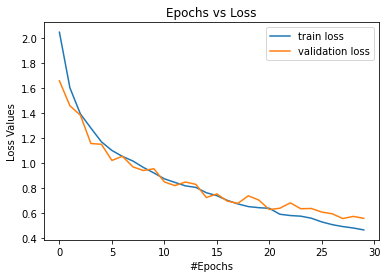

In [ ]:
plt.plot(range(len(hist.history['val_loss'])), hist.history['loss'], label='train loss')
plt.plot(range(len(hist.history['val_loss'])), hist.history['val_loss'], label='validation loss')
plt.xlabel("#Epochs")
plt.ylabel("Loss Values")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

In [ ]:
print(classification_report(testCNNLabel.argmax(axis=1), model5.predict(testCNN).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       236
           1       0.74      0.84      0.78       247
           2       0.85      0.81      0.83       266
           3       0.66      0.86      0.75       224
           4       0.88      0.92      0.90       261
           5       0.92      0.92      0.92       261
           6       0.83      0.65      0.73       248
           7       0.83      0.76      0.79       241
           8       0.86      0.81      0.83       258
           9       0.87      0.79      0.83       257

    accuracy                           0.81      2499
   macro avg       0.81      0.81      0.80      2499
weighted avg       0.81      0.81      0.81      2499



In [ ]:
model5.save(main_folder + 'CNNModel2.h5')

In [ ]:
pqr = keras.models.load_model(main_folder + 'CNNModel2.h5')
print(classification_report(testCNNLabel.argmax(axis=1), pqr.predict(testCNN).argmax(axis=1)))

#### CNN Model 3:

In [ ]:
model6 = Sequential()
model6.add(Conv2D(128, (3,3), activation='relu', padding='valid', input_shape=(trainCNN.shape[1:])))
model6.add(MaxPooling2D((3,3), padding='same'))
model6.add(Dropout(0.3))
model6.add(Conv2D(256, (3,3), activation='relu', padding='valid'))
model6.add(MaxPooling2D((2,2), padding='same'))
model6.add(Dropout(0.3))
model6.add(Conv2D(256, (3,3), activation='relu', padding='valid'))
model6.add(GlobalAveragePooling2D())
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.3))
model6.add(Dense(256, activation='relu'))
model6.add(Dropout(0.3))
model6.add(Dense(128, activation='relu'))
model6.add(Dense(10, activation='softmax'))
optimizer = Adam()
model6.compile(optimizer,loss='categorical_crossentropy', metrics=['accuracy'])
hist = model6.fit(trainCNN, trainCNNLabel, validation_split=0.2, epochs=30, batch_size=128)

Epoch 1/30
47/47 [==============================] - 8s 144ms/step - loss: 2.1760 - accuracy: 0.1924 - val_loss: 1.7439 - val_accuracy: 0.3487
Epoch 2/30
47/47 [==============================] - 6s 120ms/step - loss: 1.6687 - accuracy: 0.3757 - val_loss: 1.4522 - val_accuracy: 0.4493
Epoch 3/30
47/47 [==============================] - 6s 120ms/step - loss: 1.4914 - accuracy: 0.4372 - val_loss: 1.3363 - val_accuracy: 0.4993
Epoch 4/30
47/47 [==============================] - 6s 119ms/step - loss: 1.3734 - accuracy: 0.4826 - val_loss: 1.2322 - val_accuracy: 0.5433
Epoch 5/30
47/47 [==============================] - 6s 120ms/step - loss: 1.2516 - accuracy: 0.5283 - val_loss: 1.1689 - val_accuracy: 0.5720
Epoch 6/30
47/47 [==============================] - 6s 121ms/step - loss: 1.1919 - accuracy: 0.5609 - val_loss: 1.2164 - val_accuracy: 0.5713
Epoch 7/30
47/47 [==============================] - 6s 120ms/step - loss: 1.1130 - accuracy: 0.6043 - val_loss: 1.0761 - val_accuracy: 0.6153
Epoch 

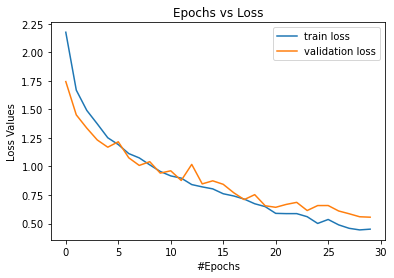

In [ ]:
plt.plot(range(len(hist.history['val_loss'])), hist.history['loss'], label='train loss')
plt.plot(range(len(hist.history['val_loss'])), hist.history['val_loss'], label='validation loss')
plt.xlabel("#Epochs")
plt.ylabel("Loss Values")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

In [ ]:
print(classification_report(testCNNLabel.argmax(axis=1), model6.predict(testCNN).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       236
           1       0.83      0.74      0.78       247
           2       0.89      0.83      0.86       266
           3       0.72      0.81      0.76       224
           4       0.88      0.92      0.90       261
           5       0.90      0.97      0.93       261
           6       0.74      0.68      0.71       248
           7       0.77      0.85      0.81       241
           8       0.83      0.85      0.84       258
           9       0.83      0.82      0.83       257

    accuracy                           0.81      2499
   macro avg       0.81      0.81      0.81      2499
weighted avg       0.81      0.81      0.81      2499



In [ ]:
model6.save(main_folder + 'CNNModel3.h5')

In [13]:
pqr = keras.models.load_model(main_folder + 'CNNModel3.h5')
print(classification_report(testCNNLabel.argmax(axis=1), pqr.predict(testCNN).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       236
           1       0.83      0.74      0.78       247
           2       0.89      0.83      0.86       266
           3       0.72      0.81      0.76       224
           4       0.88      0.92      0.90       261
           5       0.90      0.97      0.93       261
           6       0.74      0.68      0.71       248
           7       0.77      0.85      0.81       241
           8       0.83      0.85      0.84       258
           9       0.83      0.82      0.83       257

    accuracy                           0.81      2499
   macro avg       0.81      0.81      0.81      2499
weighted avg       0.81      0.81      0.81      2499

